In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.lines import Line2D

In [2]:
%matplotlib inline
sns.set()
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# 1.臺北捷運全系統每日旅運量 Daily Ridership (2016-202106)

In [4]:
ridership = pd.read_csv('./Data/Taipei_Metro_Ridership_201601-202106.csv')
ridership['Date'] = pd.to_datetime(ridership['Date'])
ridership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2008 non-null   datetime64[ns]
 1   Year       2008 non-null   int64         
 2   Month      2008 non-null   int64         
 3   DayofWeek  2008 non-null   int64         
 4   Ridership  2008 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 78.6 KB


In [5]:
ridership.head()

,Date,Year,Month,DayofWeek,Ridership
0,2016-01-01,2016,1,4,1873454
1,2016-01-02,2016,1,5,1846862
2,2016-01-03,2016,1,6,1507044
3,2016-01-04,2016,1,0,1991063
4,2016-01-05,2016,1,1,2044627


## 1.1 年旅運量變化 Yearly Ridership

In [6]:
temp = ridership.groupby(by='Year')['Ridership'].sum()/1000000
temp

Year
2016    739.990166
2017    746.066556
2018    765.470127
2019    789.599014
2020    695.650777
2021    280.335984
Name: Ridership, dtype: float64

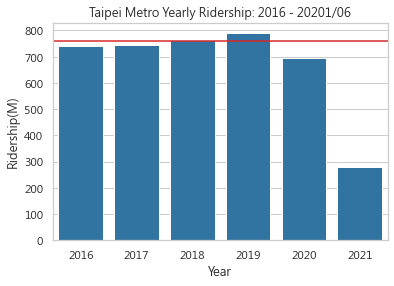

In [16]:
sns.barplot(x=temp.index, y=temp, color='tab:blue')
plt.axhline(y=temp[:4].mean(), xmin=0, xmax=1, color='tab:red')
plt.ylabel('Ridership(M)')
plt.title('Taipei Metro Yearly Ridership: 2016 - 20201/06')
plt.show()

2016~2019年旅運量逐年增加，但2020年旅運量比起平均值前四年皆低，推測為COVID-19造成此現象。

In [17]:
print(f'2016至2019平均年旅運量為 {temp[:4].mean()} 百萬')
print(f'2020年年旅運量為 {temp[2020]} 百萬，與2016至2019平均年旅運量相比減少 {round((temp[:4].mean()-temp[2020])/temp[:4].mean()*100,2)}%')

2016至2019平均年旅運量為 760.2814657499999 百萬
2020年年旅運量為 695.650777 百萬，與2016至2019平均年旅運量相比減少 8.5%


## 1.2 日旅運量變化 Daily Ridership

In [19]:
(ridership['Ridership']/10000).describe()

count    2008.000000
mean      200.055410
std        38.303826
min        14.993600
25%       187.652175
50%       210.532850
75%       221.660050
max       320.607800
Name: Ridership, dtype: float64

In [20]:
ridership[ridership['Ridership'] == ridership['Ridership'].max()]

,Date,Year,Month,DayofWeek,Ridership
1460,2019-12-31,2019,12,1,3206078


In [21]:
ridership[ridership['Ridership'] == ridership['Ridership'].min()]

,Date,Year,Month,DayofWeek,Ridership
1976,2021-05-30,2021,5,6,149936


* 平均每日旅運量為200萬。
* 2016至今最高日旅運量為2019/12/31，約320萬，推測為跨年活動造成尖峰時段
* 2016至今最低日旅運量為2021/05/30，約14萬，推測為因COVID-19防疫於2021/5/19採取三級警戒措施造成。

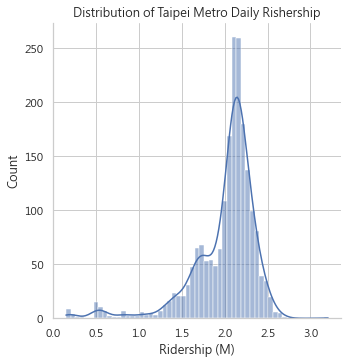

In [22]:
sns.displot(x=ridership['Ridership']/1000000, kde=True)
plt.xlabel('Ridership (M)')
plt.title('Distribution of Taipei Metro Daily Rishership')
plt.show()

#### 平均日旅運量依月份

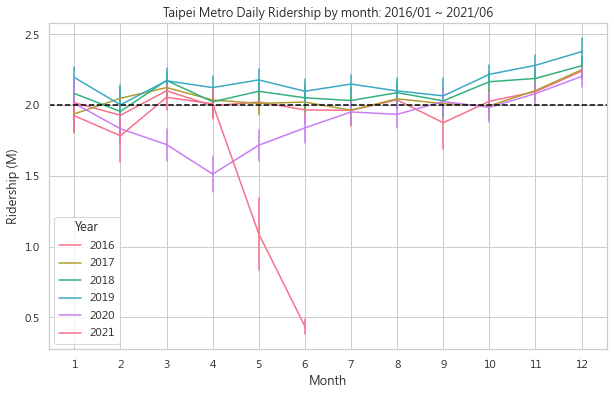

In [15]:
fig = plt.figure(figsize=(10, 6))
sns.lineplot(x=ridership['Month'], y=ridership['Ridership']/1000000, hue=ridership['Year'], err_style='bars', palette='husl')
plt.axhline(y=ridership['Ridership'].mean()/1000000, xmin=0, xmax=1, color='black', linestyle='dashed')
plt.xticks(ridership['Month'].unique())
plt.ylabel('Ridership (M)')
plt.title('Taipei Metro Daily Ridership by month: 2016/01 ~ 2021/06')
plt.show()

2016至2019年，月平均日旅運量變化趨勢雷同
* 2月日旅運量最低，推測為春節期間造成
* 10-12月總旅運量提升，其中以12月較高，推測因冬季與跨年活動造成，可額外再做分析以驗證。

自2020年日旅運量趨勢改變，推測因COVID-19疫情影響
* 2020/01/22臺灣首例確認個案，疫情關注度提升，2020/03月總旅運量降低。
* 2020/04/03政府公告規定搭乘捷運需強制戴口罩，4/18軍人驗出群聚感染，當月總旅運量來到當年最低。
* 2020/04/30政府啟動「防疫新生活」，疫情每日確診數增加少量，2020/05-12總旅運量再次提升，但並無達到前幾年平均日旅運量。
* 2021/05/11政府提升全國疫情警戒至第二級，05/15雙北地區警戒提升至第三級，5/19全國警戒提升至第三級，日旅運量當月起大幅下降。

COVID-19資料參考: https://covid19.mohw.gov.tw/ch/sp-timeline0-205.html

In [16]:
#fig.savefig('2016至2021年6月台北捷運分月平均日旅運量.png', dpi=200)

#### 平均日旅運量依星期幾

In [17]:
ridership['DayofWeek'].unique()

array([4, 5, 6, 0, 1, 2, 3], dtype=int64)

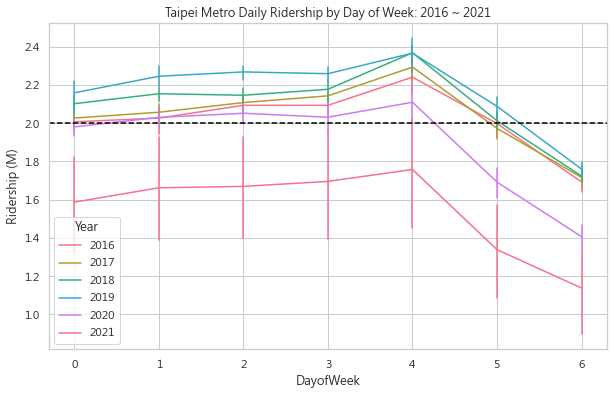

In [18]:
fig = plt.figure(figsize=(10, 6))
sns.lineplot(x=ridership['DayofWeek'], y=ridership['Ridership']/1000000, hue=ridership['Year'], 
             err_style='bars', palette='husl')
plt.axhline(y=ridership['Ridership'].mean()/1000000, xmin=0, xmax=1, color='black', linestyle='dashed')
plt.ylabel('Ridership (M)')
plt.title('Taipei Metro Daily Ridership by Day of Week: 2016 ~ 2021')
plt.show()

* 平均日旅運量平日比假日高，且假日平均日旅運量低於平均值200萬，推測大宗搭乘旅客為上班通勤族造成此差別。
* 週五(DayofWeek=4)較其他平日高。
* COVID-19前後，趨勢無特別差異，平均日旅運量總量降低。

In [30]:
ridership[ridership['Ridership'] == ridership[ridership['Year'] == 2020]['Ridership'].min()]

,Date,Year,Month,DayofWeek,Ridership
1555,2020-04-04,2020,4,5,808469


In [46]:
ridership[ridership['Ridership'] == ridership[ridership['Year'] == 2021]['Ridership'].min()]

,Date,Year,Month,DayofWeek,Ridership
1976,2021-05-30,2021,5,6,149936


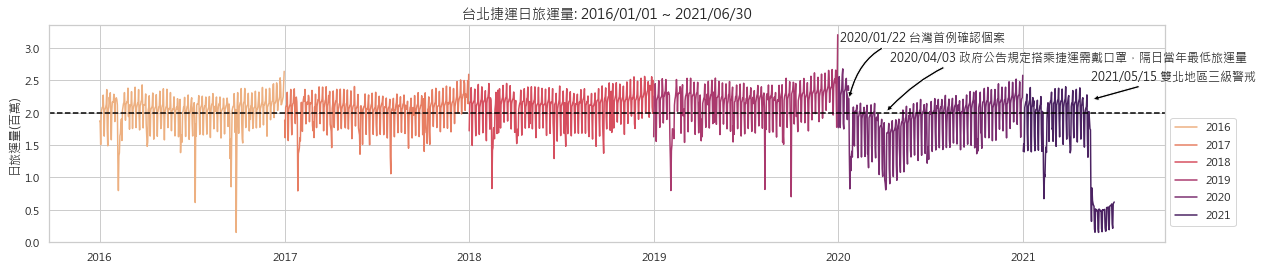

In [56]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.lineplot(x=ridership['Date'], y=ridership['Ridership']/1000000, hue=ridership['Year'], palette='flare', ax=ax)
ax.axhline(y=ridership['Ridership'].mean()/1000000, xmin=0, xmax=1, color='black', linestyle='dashed')
ax.legend(loc='lower left', bbox_to_anchor=(1,.05))
ax.set_xlabel('')
ax.set_ylabel('日旅運量(百萬)')
ax.set_title('台北捷運日旅運量: 2016/01/01 ~ 2021/06/30', fontsize=14)
ax.annotate('2020/01/22 台灣首例確認個案', xy=(datetime(2020,1,22), 2.2), xytext=(datetime(2020,1,5), 3.1), 
            arrowprops=dict(arrowstyle='simple', connectionstyle='arc3,rad=0.4', facecolor='black'))
ax.annotate('2020/04/03 政府公告規定搭乘捷運需戴口罩，隔日當年最低旅運量', 
            xy=(datetime(2020,4,3), 2), xytext=(datetime(2020,4,12), 2.8), 
            arrowprops=dict(arrowstyle='simple', connectionstyle='arc3,rad=0.3', facecolor='black'))
ax.annotate('2021/05/15 雙北地區三級警戒', xy=(datetime(2021,5,15), 2.2), xytext=(datetime(2021,5,15), 2.5), 
           arrowprops=dict(arrowstyle='simple', connectionstyle='arc3,rad=0', facecolor='black'))
plt.show()

2016-2019年日旅運量變化趨勢類似，而2020年起完全不同，推測為COVID19造成此現象。

In [57]:
#fig.savefig('2016至2021年6月台北捷運平均日旅運量.png', dpi=200)

## 1.3 COVID-19前後平均日旅運量差異

In [19]:
print(f"COVID-19前平均日旅運量：{ridership[ridership['Year'] <= 2019]['Ridership'].mean()/10000}萬")
print(f"COVID-19後平均日旅運量：{ridership[ridership['Year'] > 2019]['Ridership'].mean()/10000}萬")

COVID-19前平均日旅運量：208.15372094455853萬
COVID-19後平均日旅運量：178.4253676416819萬


In [20]:
print('與COVID-19前平均日旅運量差異：')
(ridership[ridership['Year'] > 2019]['Ridership'].mean() - ridership[ridership['Year'] <= 2019]['Ridership'].mean())/ridership[ridership['Year'] <= 2019]['Ridership'].mean()

與COVID-19前平均日旅運量差異：


-0.1428192259450156

In [21]:
temp = ridership[ridership['Date'] >= datetime.strptime('20210515','%Y%m%d')]['Ridership'].mean()
print(f"COVID-19三級警戒後平均日旅運量：{temp/10000}萬")

COVID-19三級警戒後平均日旅運量：44.52020212765958萬


In [22]:
print('與COVID-19前平均日旅運量差異：')
(temp - ridership[ridership['Year'] <= 2019]['Ridership'].mean())/ridership[ridership['Year'] <= 2019]['Ridership'].mean()

與COVID-19前平均日旅運量差異：


-0.7861186342207283

#### 比較：台灣COVID-19確診案例數量

資料來源：政府資料開放平台 - 地區年齡性別統計表-嚴重特殊傳染性肺炎-依個案研判日統計: https://data.gov.tw/dataset/120711

In [23]:
covid_cases = pd.read_csv('./Data/Day_Confirmation_Age_County_Gender_19CoV.csv')
covid_cases['個案研判日'] = pd.to_datetime(covid_cases['個案研判日'])
covid_cases = pd.DataFrame(covid_cases.groupby('個案研判日')['確定病例數'].sum().reset_index())
covid_cases.rename(columns={'個案研判日':'Date','確定病例數':'Cases'}, inplace=True)
covid_cases.tail()

,Date,Cases
370,2021-07-14,27
371,2021-07-15,18
372,2021-07-16,32
373,2021-07-17,12
374,2021-07-18,18


In [24]:
covid_cases['Date'].min(), covid_cases['Date'].max()

(Timestamp('2020-01-22 00:00:00'), Timestamp('2021-07-18 00:00:00'))

In [25]:
ridership = ridership.merge(covid_cases, how='left', on='Date')
ridership['Cases'].fillna(0, inplace=True)
ridership.head()

,Date,Year,Month,DayofWeek,Ridership,Cases
0,2016-01-01,2016,1,4,1873454,0.0
1,2016-01-02,2016,1,5,1846862,0.0
2,2016-01-03,2016,1,6,1507044,0.0
3,2016-01-04,2016,1,0,1991063,0.0
4,2016-01-05,2016,1,1,2044627,0.0


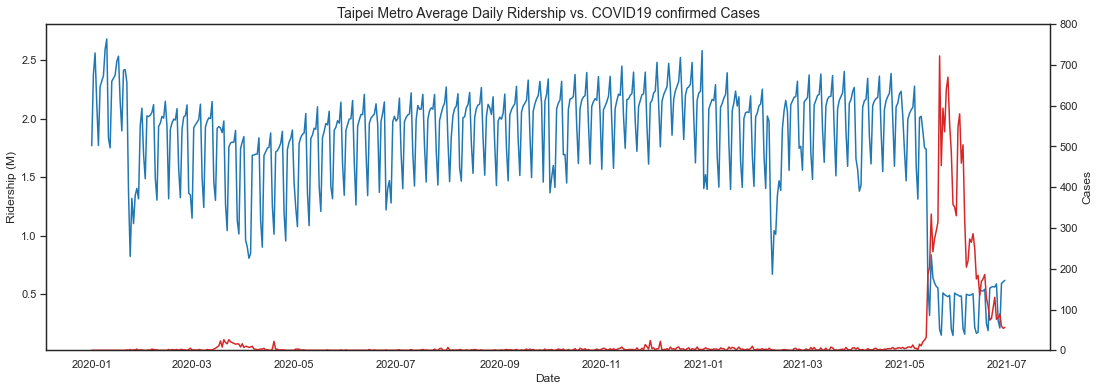

In [26]:
sns.set_style('white')
fig = plt.figure(figsize=(18,6))
ax1 = sns.lineplot(x=ridership[ridership['Year']>=2020]['Date'], 
                   y=ridership[ridership['Year']>=2020]['Ridership']/1000000, color='tab:blue')
ax1.set_ylabel('Ridership (M)')
ax2 = ax1.twinx()
ax2.set_ylim(bottom=0, top=800)
sns.lineplot(x=ridership[ridership['Year']>=2020]['Date'], 
             y=ridership[ridership['Year']>=2020]['Cases'], ax=ax2, color='tab:red')
plt.title('Taipei Metro Average Daily Ridership vs. COVID19 confirmed Cases', fontsize=14)
plt.show()

In [27]:
#fig.savefig('台北捷運日旅運量與Covid19確診案例數.png', dpi=200)

In [28]:
print(f"COVID19確診案例數與台北捷運日旅運量相關係數為：{ridership.corr().loc['Cases','Ridership']}")

COVID19確診案例數與台北捷運日旅運量相關係數為：-0.5374242987104962


# 2. 各捷運站進出站次數(2016-202106)

In [29]:
station_ridership = pd.read_csv('./Data/Taipei_Metro_Ridership_by_Station_201601-202106.csv')
station_ridership['Date'] = pd.to_datetime(station_ridership['Date'])
station_ridership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222881 entries, 0 to 222880
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             222881 non-null  datetime64[ns]
 1   Year             222881 non-null  int64         
 2   Month            222881 non-null  int64         
 3   DayofWeek        222881 non-null  int64         
 4   Station          222881 non-null  object        
 5   Entrance_Counts  222881 non-null  int64         
 6   Exit_Counts      222881 non-null  int64         
 7   Counts           222881 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 13.6+ MB


In [30]:
station_ridership.tail()

,Date,Year,Month,DayofWeek,Station,Entrance_Counts,Exit_Counts,Counts
222876,2021-06-26,2021,6,5,新北產業園區,623,604,1227
222877,2021-06-27,2021,6,6,新北產業園區,437,495,932
222878,2021-06-28,2021,6,0,新北產業園區,1667,1626,3293
222879,2021-06-29,2021,6,1,新北產業園區,1721,1695,3416
222880,2021-06-30,2021,6,2,新北產業園區,1685,1714,3399


In [31]:
station_ridership[['Entrance_Counts','Exit_Counts','Counts']].describe()

,Entrance_Counts,Exit_Counts,Counts
count,222881.000000,222881.000000,222881.000000
mean,18007.666374,18007.666374,36015.332747
std,17939.533426,18046.323267,35957.911721
min,0.000000,0.000000,0.000000
25%,7710.000000,7547.000000,15282.000000
50%,13290.000000,13120.000000,26373.000000
75%,24276.000000,24461.000000,48731.000000
max,247112.000000,228713.000000,475825.000000


## 2.1 各捷運站平均日進出站次數

In [32]:
stations = pd.read_csv('./Data/Taipei_Metro_Stations.csv')
stations.tail()

,Code,Station,Line,Line2,Cross_Lines,Lines_Transfer,Transportation
114,Y15,板新,Y,N,0,0,0
115,Y16,Y板橋,Y,N,0,1,1
116,Y17,新埔民生,Y,N,0,1,0
117,Y19,幸福,Y,N,0,0,0
118,Y20,新北產業園區,Y,N,0,0,1


In [33]:
def get_line(stationname):
    i = stations[stations['Station'] == stationname].index[0]
    if stations.at[i,'Line2'] == 'N':
        result = stations.at[i,'Line']
    else:
        result = 'T'
    return result

In [34]:
transfer_stations = stations[stations['Transportation'] == 1]['Station'].values
transfer_stations

array(['BL板橋', '台北車站', '南港', '動物園', '松山機場', '北門', '松山', '紅樹林', '三重',
       'Y板橋', '新北產業園區'], dtype=object)

In [35]:
daily_station = station_ridership.pivot_table(values=['Entrance_Counts','Exit_Counts','Counts'], index='Station', aggfunc=np.mean).sort_values(by='Counts', ascending=False).reset_index()
daily_station['Line'] = daily_station['Station'].apply(lambda _: get_line(_))
daily_station['Transfer'] = daily_station['Station'].isin(transfer_stations)
daily_station.tail(5)

,Station,Counts,Entrance_Counts,Exit_Counts,Line,Transfer
114,板新,4142.945155,2062.541133,2080.404022,Y,False
115,秀朗橋,4035.923218,1969.510055,2066.413163,Y,False
116,新埔民生,3733.142596,1785.424132,1947.718464,Y,False
117,橋和,3007.329068,1495.294333,1512.034735,Y,False
118,十四張,1734.872029,906.488117,828.383912,Y,False


環狀線於2020/01/31年開通，直接平均不準確，需只用2020-2021年資料運算

In [36]:
temp = station_ridership[station_ridership['Year'] >= 2020].pivot_table(values=['Entrance_Counts','Exit_Counts','Counts'], index='Station', aggfunc=np.mean).sort_values(by='Counts', ascending=False).reset_index()
temp['Line'] = temp['Station'].apply(lambda _: get_line(_))
temp['Transfer'] = temp['Station'].isin(transfer_stations)
temp[temp['Line'] == 'Y']

,Station,Counts,Entrance_Counts,Exit_Counts,Line,Transfer
90,Y板橋,13559.398537,6831.100548,6728.297989,Y,True
100,中和,7657.513711,3784.321755,3873.191956,Y,False
106,新北產業園區,6342.893967,3145.031079,3197.862888,Y,True
108,幸福,5741.451554,2741.378428,3000.073126,Y,False
109,景平,5657.939671,2682.948812,2974.990859,Y,False
112,中原,4185.687386,2099.283364,2086.404022,Y,False
113,板新,4142.945155,2062.541133,2080.404022,Y,False
114,秀朗橋,4035.923218,1969.510055,2066.413163,Y,False
116,新埔民生,3733.142596,1785.424132,1947.718464,Y,False
117,橋和,3007.329068,1495.294333,1512.034735,Y,False


In [37]:
daily_station = daily_station[daily_station['Line'] != 'Y']
daily_station = pd.concat([daily_station,temp[temp['Line'] == 'Y']]).reset_index().drop(columns=['index']).sort_values(by='Counts', ascending=False)

In [38]:
print('平均日進出站次數前10高的捷運站：')
daily_station.head(10)

平均日進出站次數前10高的捷運站：


,Station,Counts,Entrance_Counts,Exit_Counts,Line,Transfer
0,台北車站,293317.967131,147107.434263,146210.532869,T,True
1,西門,137328.688745,68352.054781,68976.633964,T,False
2,市政府,117785.056275,58227.973606,59557.082669,BL,False
3,忠孝復興,92048.714143,45909.886454,46138.827689,T,False
4,BL板橋,79735.511454,38403.004482,41332.506972,BL,True
5,中山,78086.986056,38492.754482,39594.231574,T,False
6,新埔,74382.656375,38017.560259,36365.096116,BL,False
7,淡水,72153.090139,36927.318227,35225.771912,R,False
8,忠孝敦化,69950.549801,34091.650398,35858.899402,BL,False
9,南京復興,69038.960159,33572.867032,35466.093127,T,False


* 台北車站平均日進出次數特別高，高達約30萬，相較第二名西門站約13萬，高出1倍。
* 大多為轉乘站，再來是板南線。

In [39]:
print('平均日進出站次數最低的10名捷運站：')
daily_station.tail(10)

平均日進出站次數最低的10名捷運站：


,Station,Counts,Entrance_Counts,Exit_Counts,Line,Transfer
112,景平,5657.939671,2682.948812,2974.990859,Y,False
105,小碧潭,5544.122510,2717.615040,2826.507470,G,False
106,忠義,5486.217629,2700.861554,2785.356076,R,False
107,萬芳社區,4254.487052,2343.506972,1910.980080,BR,False
113,中原,4185.687386,2099.283364,2086.404022,Y,False
114,板新,4142.945155,2062.541133,2080.404022,Y,False
115,秀朗橋,4035.923218,1969.510055,2066.413163,Y,False
116,新埔民生,3733.142596,1785.424132,1947.718464,Y,False
117,橋和,3007.329068,1495.294333,1512.034735,Y,False
118,十四張,1734.872029,906.488117,828.383912,Y,False


* 大多仍為環狀線(Y)
* 萬芳社區

In [40]:
colormap = {'T':'tab:purple','BL':'tab:blue','O':'tab:orange','R':'tab:red','G':'tab:green','BR':'tab:brown','Y':'tab:cyan'}
custom_legend = [Line2D([0], [0], color='tab:purple', lw=4),
                 Line2D([0], [0], color='tab:blue', lw=4),
                 Line2D([0], [0], color='tab:orange', lw=4),
                 Line2D([0], [0], color='tab:red', lw=4),
                 Line2D([0], [0], color='tab:green', lw=4),
                 Line2D([0], [0], color='tab:brown', lw=4),
                 Line2D([0], [0], color='tab:cyan', lw=4)]
custom_labels = ['轉乘站','板南線','中和新蘆線','淡水信義線','松山新店線','文湖線','環狀線']

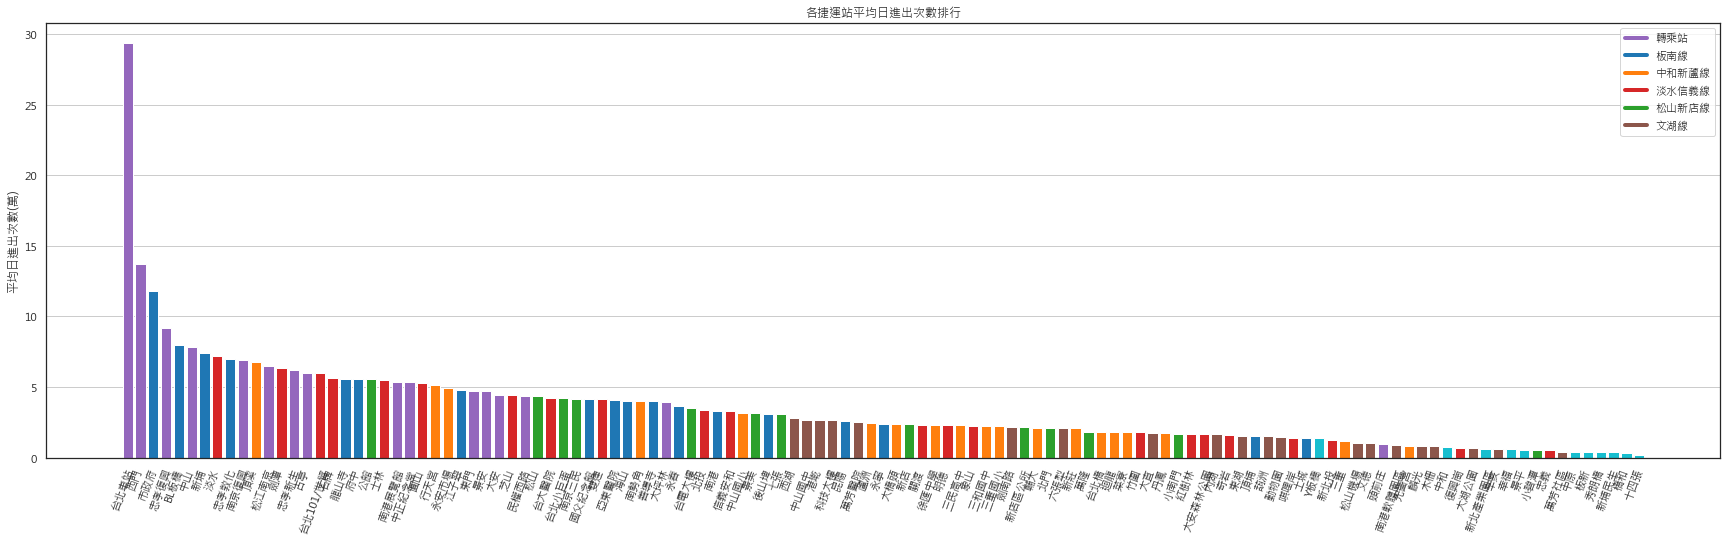

In [41]:
sns.set_style('white')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
fig = plt.figure(figsize=(30,8))
plt.bar(daily_station['Station'], daily_station['Counts']/10000, 
        color=daily_station['Line'].map(colormap).values, align='edge')
plt.legend(custom_legend[:-1], custom_labels[:-1])
plt.xticks(rotation=70)
plt.grid(axis='y')
plt.ylabel('平均日進出次數(萬)')
plt.title('各捷運站平均日進出次數排行')
plt.show()

In [42]:
#fig.savefig('各捷運站平均日進出次數排行.png', dpi=200)

#### 轉乘型捷運站平均日進出次數排行

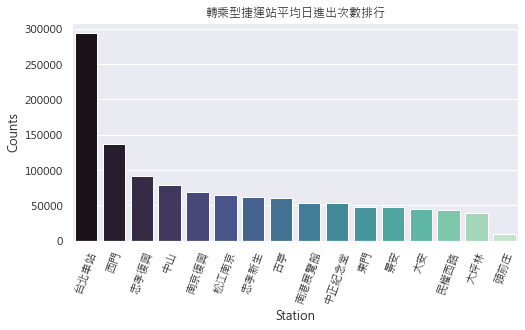

In [43]:
sns.set()
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.figure(figsize=(8,4))
sns.barplot(data=daily_station[daily_station['Line'] == 'T'], x='Station', y='Counts', palette='mako')
plt.xticks(rotation=70)
plt.title('轉乘型捷運站平均日進出次數排行')
plt.show()

#### 轉運型捷運站平均日進出次數排行

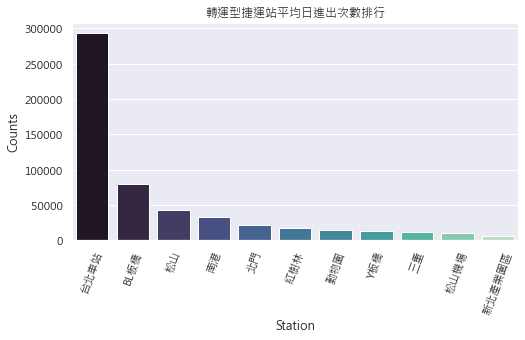

In [44]:
plt.figure(figsize=(8,4))
sns.barplot(data=daily_station[daily_station['Transfer']], x='Station', y='Counts', palette='mako')
plt.xticks(rotation=70)
plt.title('轉運型捷運站平均日進出次數排行')
plt.show()

## 2.2 各年份各捷運站日進出站次數排名

#### 比較：各年日進出站次數前五名與倒數五名之捷運站

In [45]:
def get_station_rank(year):
    df = pd.DataFrame(station_ridership[station_ridership['Year'] == year].groupby('Station')['Counts'].mean().sort_values(ascending=False)).reset_index()
    return df

In [46]:
station_2016 = get_station_rank(2016)
station_2017 = get_station_rank(2017)
station_2018 = get_station_rank(2018)
station_2019 = get_station_rank(2019)
station_2020 = get_station_rank(2020)
station_2021 = get_station_rank(2021)

In [47]:
pd.concat([station_2016[:5],station_2017[:5],station_2018[:5],station_2019[:5],station_2020[:5],station_2021[:5]], axis=1)

,Station,Counts,Station,Counts,Station,Counts,Station,Counts,Station,Counts,Station,Counts
0,台北車站,314108.612022,台北車站,315033.197260,台北車站,316363.320548,台北車站,319450.731507,台北車站,251729.076503,台北車站,192412.364641
1,西門,144158.598361,西門,147736.553425,西門,149342.413699,西門,154320.063014,市政府,114353.019126,西門,92712.679558
2,市政府,116962.770492,市政府,121130.446575,市政府,122944.643836,市政府,127166.446575,西門,113257.702186,市政府,90318.524862
3,忠孝復興,100928.363388,忠孝復興,97993.471233,忠孝復興,97511.936986,忠孝復興,96374.317808,忠孝復興,80889.344262,忠孝復興,64930.591160
4,BL板橋,80033.316940,BL板橋,82079.463014,BL板橋,85266.528767,BL板橋,87887.621918,中山,76573.431694,中山,63648.392265


* 2016-2021年前4名皆為相同捷運站，分別為「台北車站」、「西門」、「市政府」、「忠孝復興」，只有2020年「西門」、「市政府」排名調換。
* 2016-2019年第5名皆為「板橋」，直到2020年改為「中山」。

In [48]:
pd.concat([station_2016[-5:],station_2017[-5:],station_2018[-5:],station_2019[-5:],station_2020[-5:],station_2021[-5:]], axis=1)

,Station,Counts,Station,Counts,Station,Counts,Station,Counts,Station,Counts,Station,Counts
103,復興崗,6596.920765,大湖公園,6509.868493,大湖公園,6670.726027,大湖公園,6886.646575,NaN,NaN,NaN,NaN
104,辛亥,5744.912568,辛亥,5811.213699,辛亥,5929.654795,小碧潭,6573.610959,NaN,NaN,NaN,NaN
105,忠義,5173.939891,忠義,5267.479452,忠義,5640.509589,忠義,6159.189041,NaN,NaN,NaN,NaN
106,小碧潭,4589.866120,小碧潭,4688.649315,小碧潭,4761.786301,辛亥,6030.364384,NaN,NaN,NaN,NaN
107,萬芳社區,4201.336066,萬芳社區,4266.602740,萬芳社區,4450.947945,萬芳社區,4562.021918,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,萬芳社區,4162.040984,秀朗橋,3759.243094
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,中原,4122.636612,萬芳社區,3508.121547
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,新埔民生,3879.109290,新埔民生,3437.983425
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,橋和,2969.584699,橋和,3083.651934
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,十四張,1658.065574,十四張,1890.182320


* 2016-2019年後4名皆為相同捷運站，分別為「萬芳社區」、「小碧潭」、「忠義」、「小碧潭」，但排名不一。
* 2020年後環狀線通車，部分倒數排名多為環狀線車站。
* 「萬芳社區」該站近6年都有在最少進出站5名內出現。

In [49]:
temp = station_ridership.pivot_table(values='Counts', index=['Year'], columns='Station', aggfunc=np.mean, fill_value=0)
temp.head()

Station,BL板橋,Y板橋,七張,三和國中,三民高中,三重,三重國小,中原,中和,中山,...,輔大,辛亥,迴龍,關渡,雙連,頂埔,頂溪,頭前庄,麟光,龍山寺
Year,,,,,,,,,,,,,,,,,,,,,
2016,80033.316940,0.000000,30605.923497,22373.923497,23225.267760,8723.860656,22525.390710,0.000000,0.00000,75994.759563,...,21289.912568,5744.912568,16942.732240,23409.953552,42652.920765,13313.166667,68925.232240,9200.937158,7913.013661,55740.428962
2017,82079.463014,0.000000,31241.315068,22796.819178,23736.479452,11399.528767,22764.972603,0.000000,0.00000,76908.402740,...,20929.164384,5811.213699,17849.432877,23226.912329,43164.627397,14643.027397,69825.030137,8989.000000,8068.786301,57756.690411
2018,85266.528767,0.000000,31932.556164,23385.484932,23817.263014,12368.276712,23202.715068,0.000000,0.00000,80824.556164,...,21921.021918,5929.654795,18894.498630,23602.958904,44121.345205,15834.536986,71071.082192,9351.671233,8205.600000,60463.112329
2019,87887.621918,0.000000,33145.534247,24202.375342,23920.169863,13913.947945,23591.054795,0.000000,0.00000,87303.619178,...,22357.065753,6030.364384,19690.789041,23926.780822,45674.449315,16519.605479,72690.657534,10097.071233,8611.008219,62868.306849
2020,74960.297814,14205.469945,30028.677596,22169.751366,21710.658470,12231.852459,21420.415301,4122.636612,7867.07377,76573.431694,...,21282.426230,5683.967213,18920.628415,22521.502732,37188.491803,16276.163934,65031.773224,10727.576503,7569.453552,50468.672131


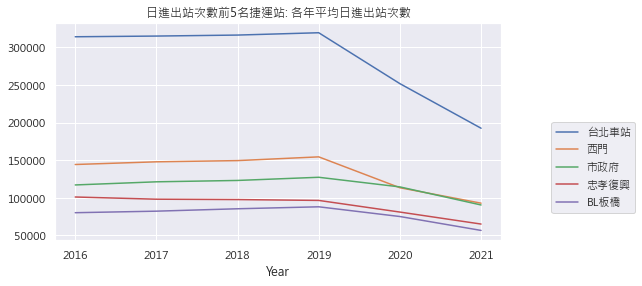

In [50]:
sns.set()
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.figure(figsize=(8,4))
sns.lineplot(data=temp[daily_station['Station'][:5]], dashes=False)
plt.legend(loc='lower left', bbox_to_anchor=(1.1,.1))
plt.title('日進出站次數前5名捷運站: 各年平均日進出站次數')
plt.show()

In [51]:
del station_2016, station_2017, station_2018, station_2019, station_2020, station_2021

## 2.3 COVID-19後平均日進出次數減少最多的捷運站？

In [52]:
station_before = pd.DataFrame(station_ridership[station_ridership['Year'] <= 2019].groupby('Station')['Counts'].mean().sort_values(ascending=False)).reset_index()
station_before['Rank'] = station_before.index + 1
station_before.tail()

,Station,Counts,Rank
103,大湖公園,6685.488022,104
104,辛亥,5878.944559,105
105,忠義,5560.015058,106
106,小碧潭,5153.092402,107
107,萬芳社區,4370.111567,108


In [53]:
station_after = pd.DataFrame(station_ridership[station_ridership['Year'] >= 2020].groupby('Station')['Counts'].mean().sort_values(ascending=False)).reset_index()
station_after['Rank'] = station_after.index + 1
station_after.tail()

,Station,Counts,Rank
114,秀朗橋,4035.923218,115
115,萬芳社區,3945.661792,116
116,新埔民生,3733.142596,117
117,橋和,3007.329068,118
118,十四張,1734.872029,119


環狀線2020年啟用，無法比較

In [54]:
station_comp = station_before.merge(station_after, how='inner', on='Station', suffixes=['_before','_After'])
station_comp['Line'] = station_comp['Station'].apply(lambda _: get_line(_))
station_comp['Diff_ratio'] = (station_comp['Counts_After'] - station_comp['Counts_before'])/station_comp['Counts_After']
station_comp['Rank_diff'] = station_comp['Rank_before'] - station_comp['Rank_After']
station_comp = station_comp.sort_values(by='Diff_ratio').reset_index().drop(columns=['index'])
station_comp.head()

,Station,Counts_before,Rank_before,Counts_After,Rank_After,Line,Diff_ratio,Rank_diff
0,松山機場,11270.434634,96,7232.530165,104,BR,-0.558298,-8
1,動物園,15949.698152,87,10632.776965,95,BR,-0.500050,-8
2,劍潭,69204.436687,12,46761.027422,20,R,-0.479960,-8
3,新北投,13434.650240,94,9389.325411,97,R,-0.430843,-3
4,西門,148886.169062,2,106459.440585,2,T,-0.398525,0


In [55]:
station_comp.tail()

,Station,Counts_before,Rank_before,Counts_After,Rank_After,Line,Diff_ratio,Rank_diff
103,頂埔,15076.376454,91,15315.506399,85,BL,0.015614,6
104,南港軟體園區,8686.800137,99,8827.329068,99,BR,0.015920,0
105,頭前庄,9409.527036,98,10076.764168,96,T,0.066215,2
106,紅樹林,15534.312115,89,19733.904936,73,R,0.212811,16
107,小碧潭,5153.092402,107,6588.537477,105,G,0.217870,2


In [56]:
station_comp['Line'].unique()

array(['BR', 'R', 'T', 'BL', 'G', 'O'], dtype=object)

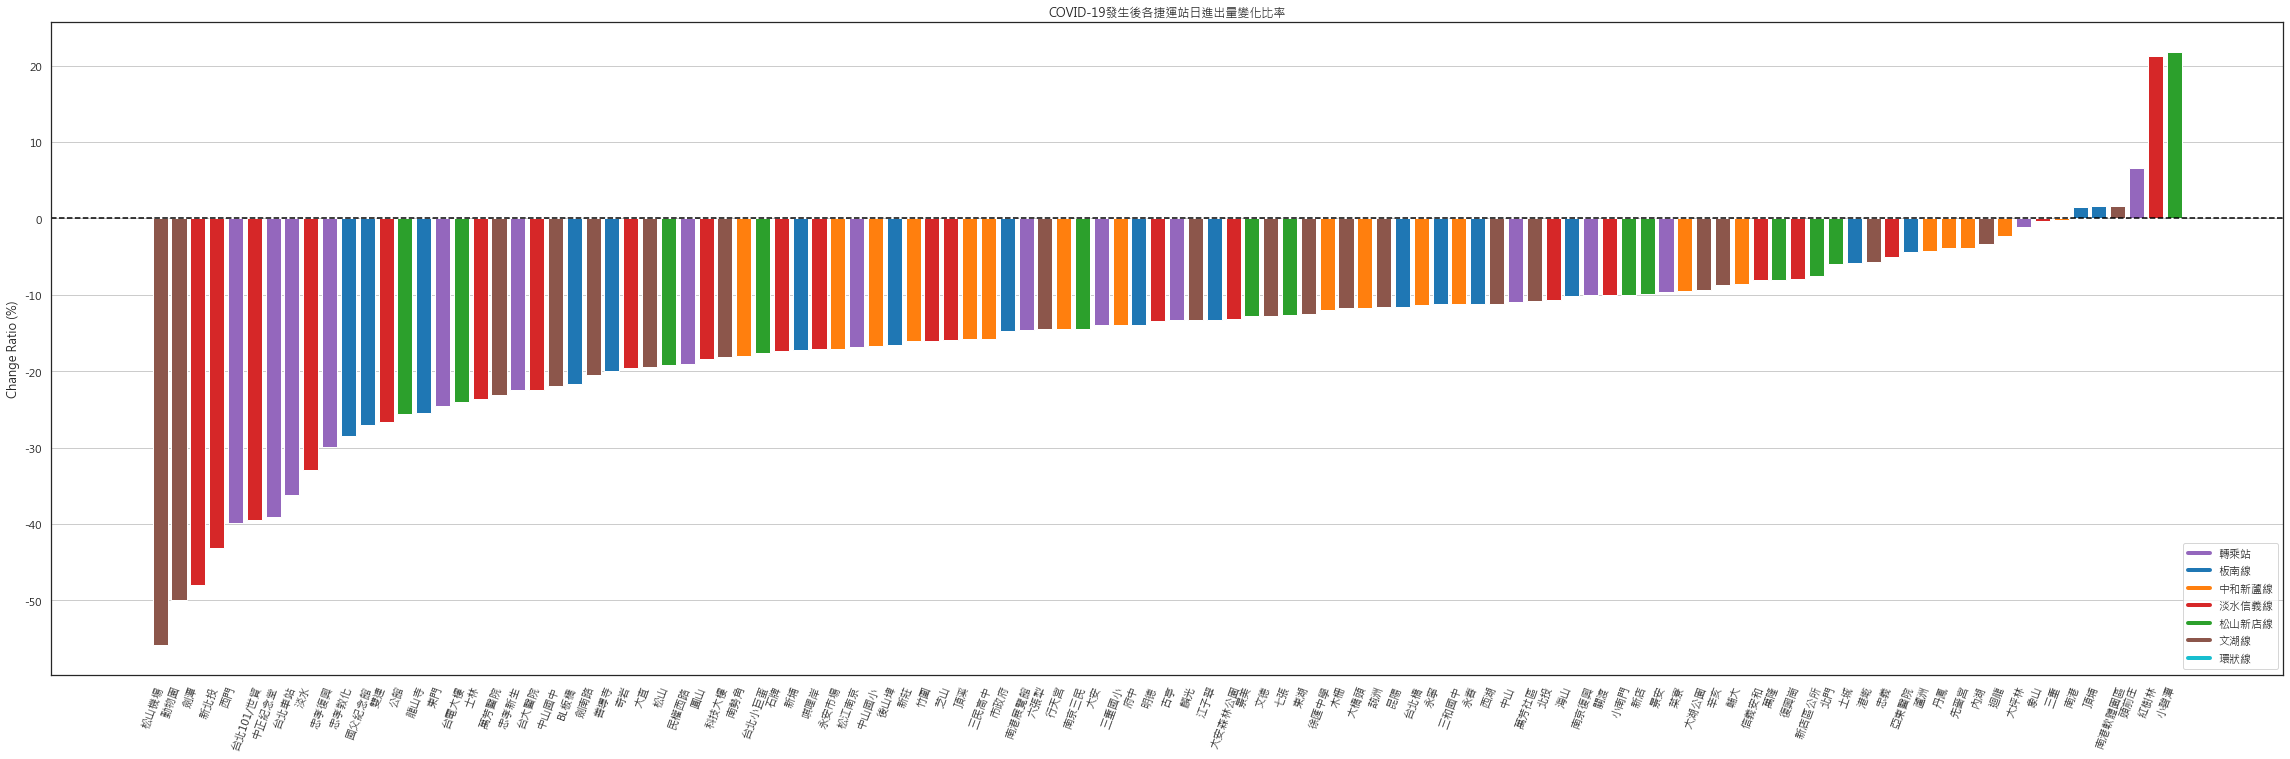

In [57]:
sns.set_style('white')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
mpl.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(40,12))
plt.bar(station_comp['Station'], station_comp['Diff_ratio']*100, 
        color=station_comp['Line'].map(colormap).values, align='edge')
plt.axhline(y=0, xmin=0, xmax=1, color='black', linestyle='dashed')
plt.legend(custom_legend, custom_labels, loc='lower right')
plt.grid(axis='y')
plt.xticks(rotation=70)
plt.ylabel('Change Ratio (%)')
plt.title('COVID-19發生後各捷運站日進出量變化比率')
plt.show()

In [58]:
#fig.savefig('COVID-19之後各捷運站日進出量變化比率排名.png', dpi=200)

In [59]:
print(f"平均各站日進出量變化比率：{station_comp['Diff_ratio'].mean()}")

平均各站日進出量變化比率：-0.14995247145421525


In [60]:
print('日進出量比例減少最多的前10名捷運站：')
station_comp.head(10)

日進出量比例減少最多的前10名捷運站：


,Station,Counts_before,Rank_before,Counts_After,Rank_After,Line,Diff_ratio,Rank_diff
0,松山機場,11270.434634,96,7232.530165,104,BR,-0.558298,-8
1,動物園,15949.698152,87,10632.776965,95,BR,-0.500050,-8
2,劍潭,69204.436687,12,46761.027422,20,R,-0.479960,-8
3,新北投,13434.650240,94,9389.325411,97,R,-0.430843,-3
4,西門,148886.169062,2,106459.440585,2,T,-0.398525,0
5,台北101/世貿,65079.004791,15,46636.310786,22,R,-0.395458,-7
6,中正紀念堂,57976.530459,20,41684.318099,28,T,-0.390848,-8
7,台北車站,316237.507187,1,232101.425960,1,T,-0.362497,0
8,淡水,77380.574949,8,58190.831810,10,R,-0.329773,-2
9,忠孝復興,98203.888433,4,75608.659963,4,T,-0.298844,0


* 松山機場站減少56%，推測為COVID-19疫情期間進出機場出境/入境搭乘者減少。
* 大量減少多為觀光景點，如動物園、劍潭(士林夜市)、新北投、台北101、中正紀念堂、淡水。
* 有部分捷運站日進出量減少，但排名未下降，如西門、台北車站、忠孝復興。

In [61]:
print('日進出量增加的捷運站：')
station_comp[station_comp['Diff_ratio'] > 0].sort_values(by='Diff_ratio')

日進出量增加的捷運站：


,Station,Counts_before,Rank_before,Counts_After,Rank_After,Line,Diff_ratio,Rank_diff
102,南港,32637.543463,49,33111.420475,45,BL,0.014312,4
103,頂埔,15076.376454,91,15315.506399,85,BL,0.015614,6
104,南港軟體園區,8686.800137,99,8827.329068,99,BR,0.015920,0
105,頭前庄,9409.527036,98,10076.764168,96,T,0.066215,2
106,紅樹林,15534.312115,89,19733.904936,73,R,0.212811,16
107,小碧潭,5153.092402,107,6588.537477,105,G,0.217870,2


* 小碧潭站增加22%，推測為IKEA新店店於2019/05/16開幕，自2019起已增加。
* 紅樹林站增加21%，推測為淡海輕軌綠山線通車(2018/12/23)造成，自2019起已增加。
* 頭前庄增加6%，推測為環狀線開通(2020/01/31)，該站為中和新蘆縣與環狀線的轉乘站。
* 南港、頂埔、南港軟體園區則有1%增加

In [62]:
station_ridership[station_ridership['Station'] == '小碧潭'].groupby('Year')['Counts'].sum()

Year
2016    1679891
2017    1711357
2018    1738052
2019    2399368
2020    2621649
2021     982281
Name: Counts, dtype: int64

In [63]:
station_ridership[station_ridership['Station'] == '紅樹林'].groupby('Year')['Counts'].sum()

Year
2016    4935446
2017    4804523
2018    5177421
2019    7778240
2020    7377464
2021    3416982
Name: Counts, dtype: int64

In [64]:
print('各線日進出量平均減少的比例排名：')
station_comp.groupby('Line')['Diff_ratio'].mean().sort_values()

各線日進出量平均減少的比例排名：


Line
T    -0.184418
R    -0.176637
BR   -0.166512
BL   -0.138839
G    -0.112345
O    -0.108859
Name: Diff_ratio, dtype: float64

* 減少最多為轉乘站，再者為淡水信義線，文湖線次之。

## 2.4 COVID-19雙北三級警戒後，平均日進出次數減少最多的捷運站？

2021/05/11政府提升全國疫情警戒至第二級，05/15雙北地區警戒提升至第三級，05/19全國警戒提升至第三級，日旅運量當月起大幅下降。

In [65]:
station_after = pd.DataFrame(station_ridership[station_ridership['Date'] >= datetime.strptime('2021-05-15','%Y-%m-%d')].groupby('Station')['Counts'].mean().sort_values(ascending=False)).reset_index()
station_after['Rank'] = station_after.index + 1
station_after.tail()

,Station,Counts,Rank
114,秀朗橋,1169.234043,115
115,萬芳社區,1158.425532,116
116,新埔民生,1142.148936,117
117,動物園,1117.702128,118
118,十四張,621.127660,119


In [66]:
station_comp2 = station_before.merge(station_after, how='inner', on='Station', suffixes=['_before','_After'])
station_comp2['Line'] = station_comp2['Station'].apply(lambda _: get_line(_))
station_comp2['Diff_ratio'] = (station_comp2['Counts_After'] - station_comp2['Counts_before']) / station_comp2['Counts_After']
station_comp2['Rank_diff'] = station_comp2['Rank_before'] - station_comp2['Rank_After']
station_comp2 = station_comp2.sort_values(by='Diff_ratio').reset_index().drop(columns=['index'])
station_comp2.head()

,Station,Counts_before,Rank_before,Counts_After,Rank_After,Line,Diff_ratio,Rank_diff
0,動物園,15949.698152,87,1117.702128,118,BR,-13.270079,-31
1,新北投,13434.650240,94,1582.638298,109,R,-7.488769,-15
2,龍山寺,59204.761807,17,7394.978723,51,BL,-7.006076,-34
3,西門,148886.169062,2,18611.851064,3,T,-6.999536,-1
4,台北車站,316237.507187,1,40526.765957,1,T,-6.803176,0


In [67]:
station_comp2.tail()

,Station,Counts_before,Rank_before,Counts_After,Rank_After,Line,Diff_ratio,Rank_diff
103,復興崗,6868.498973,103,2240.042553,99,R,-2.066236,4
104,頭前庄,9409.527036,98,3082.936170,94,T,-2.052132,4
105,忠義,5560.015058,106,1832.914894,105,R,-2.033428,1
106,先嗇宮,8194.916496,101,3080.659574,95,O,-1.660118,6
107,紅樹林,15534.312115,89,6271.680851,58,R,-1.476898,31


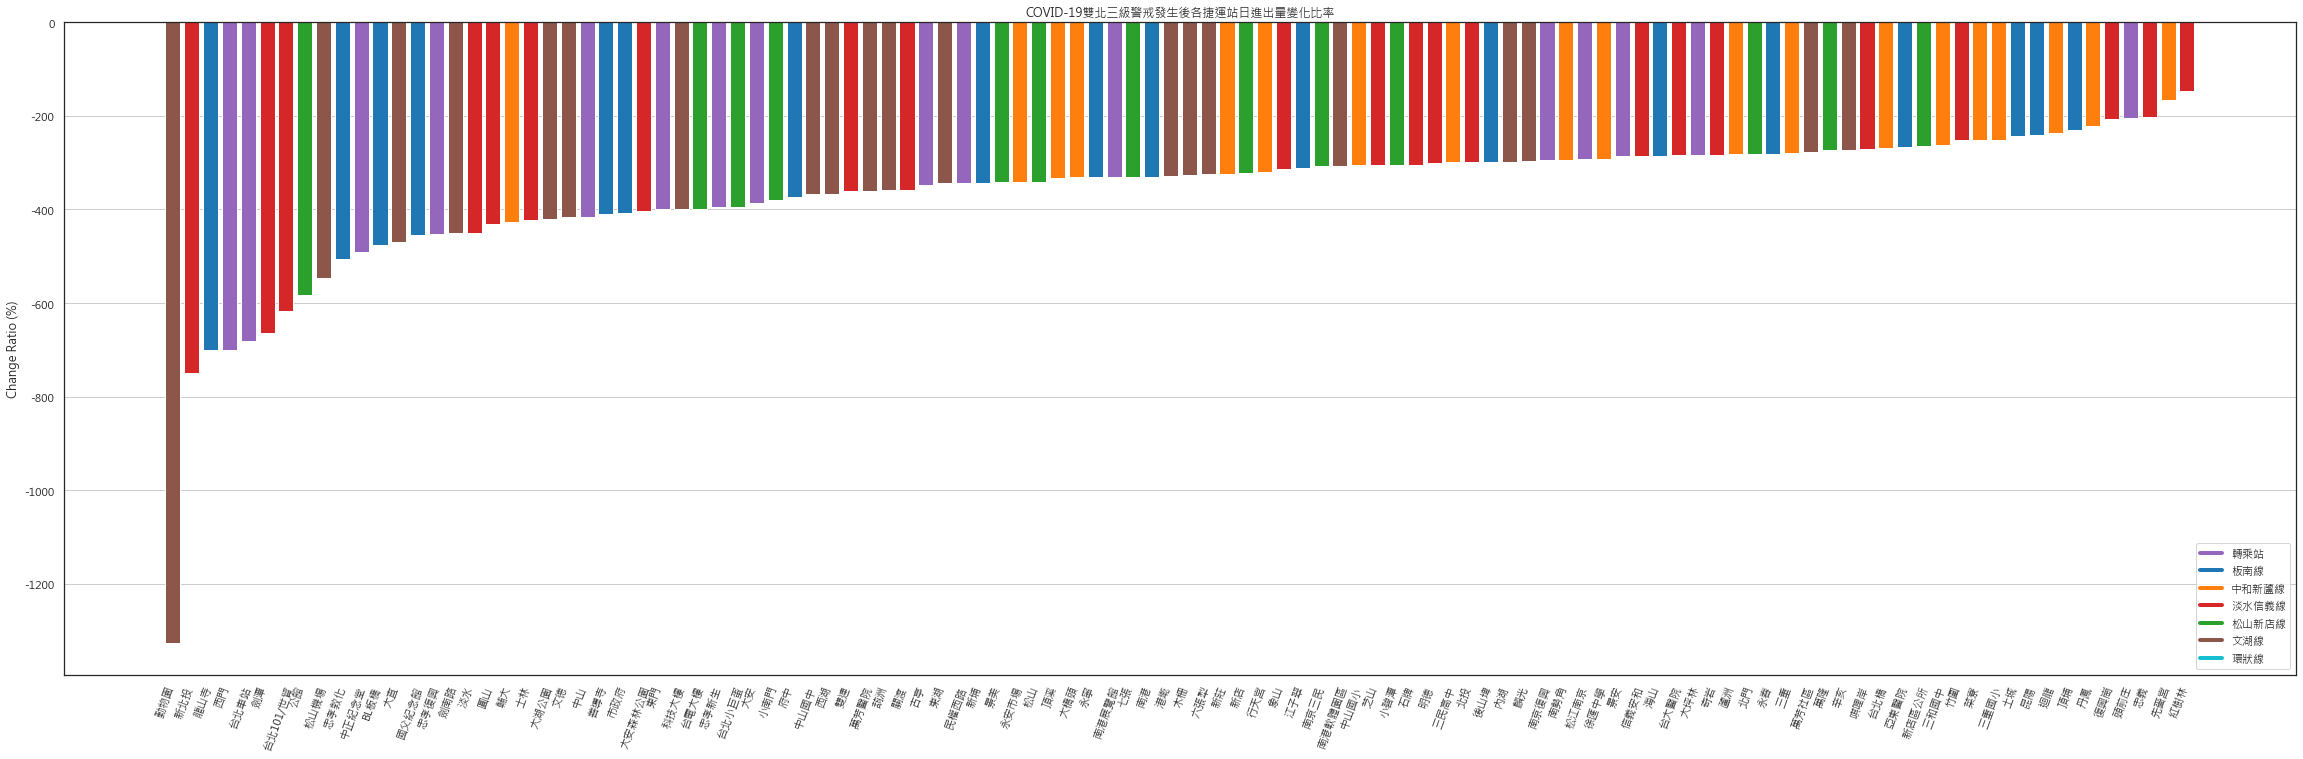

In [68]:
sns.set_style('white')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
mpl.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(40,12))
plt.bar(station_comp2['Station'], station_comp2['Diff_ratio']*100, 
        color=station_comp2['Line'].map(colormap).values, align='edge')
plt.axhline(y=0, xmin=0, xmax=1, color='black', linestyle='dashed')
plt.legend(custom_legend, custom_labels, loc='lower right')
plt.grid(axis='y')
plt.xticks(rotation=70)
plt.ylabel('Change Ratio (%)')
plt.title('COVID-19雙北三級警戒發生後各捷運站日進出量變化比率')
plt.show()

In [69]:
#fig.savefig('COVID-19三級警戒後各捷運站日進出量變化比率排名.png', dpi=200)

In [70]:
print(f"平均各站日進出量變化比率：{station_comp2['Diff_ratio'].mean()}")

平均各站日進出量變化比率：-3.607966556983212


In [71]:
print('日進出量比例減少最多的前10名捷運站：')
station_comp2.head(10)

日進出量比例減少最多的前10名捷運站：


,Station,Counts_before,Rank_before,Counts_After,Rank_After,Line,Diff_ratio,Rank_diff
0,動物園,15949.698152,87,1117.702128,118,BR,-13.270079,-31
1,新北投,13434.650240,94,1582.638298,109,R,-7.488769,-15
2,龍山寺,59204.761807,17,7394.978723,51,BL,-7.006076,-34
3,西門,148886.169062,2,18611.851064,3,T,-6.999536,-1
4,台北車站,316237.507187,1,40526.765957,1,T,-6.803176,0
5,劍潭,69204.436687,12,9070.127660,38,R,-6.629930,-26
6,台北101/世貿,65079.004791,15,9068.234043,39,R,-6.176591,-24
7,公館,59001.918549,18,8651.595745,42,G,-5.819773,-24
8,松山機場,11270.434634,96,1742.808511,107,BR,-5.466823,-11
9,忠孝敦化,74449.024641,9,12304.765957,18,BL,-5.050422,-9


In [72]:
station_comp[:10]

,Station,Counts_before,Rank_before,Counts_After,Rank_After,Line,Diff_ratio,Rank_diff
0,松山機場,11270.434634,96,7232.530165,104,BR,-0.558298,-8
1,動物園,15949.698152,87,10632.776965,95,BR,-0.500050,-8
2,劍潭,69204.436687,12,46761.027422,20,R,-0.479960,-8
3,新北投,13434.650240,94,9389.325411,97,R,-0.430843,-3
4,西門,148886.169062,2,106459.440585,2,T,-0.398525,0
5,台北101/世貿,65079.004791,15,46636.310786,22,R,-0.395458,-7
6,中正紀念堂,57976.530459,20,41684.318099,28,T,-0.390848,-8
7,台北車站,316237.507187,1,232101.425960,1,T,-0.362497,0
8,淡水,77380.574949,8,58190.831810,10,R,-0.329773,-2
9,忠孝復興,98203.888433,4,75608.659963,4,T,-0.298844,0


* 比起COVID-19發生後變化比率的排名中不同，較高排名以觀光景點為多，如動物園、新北投、台北101、龍山寺，而松山機場的比例下降。
* 公館站可能是因為學校關閉，造成其日進出量有大幅的減少

In [73]:
print('各線日進出量平均減少的比例排名：')
station_comp2.groupby('Line')['Diff_ratio'].mean().sort_values()

各線日進出量平均減少的比例排名：


Line
BR   -4.127848
T    -3.941233
BL   -3.605807
R    -3.596325
G    -3.476686
O    -2.885426
Name: Diff_ratio, dtype: float64

* 三級警戒後，文湖線減少最多，再者為轉乘站，板南線次之。

## 2.5 平均日進出次數平日>假日的捷運站

假設平均日進出次數平日>假日的捷運站，該進出站多為通勤需求，再以此捷運站名單來看COVID-19發生之後的減少情況。

#### 2016-2019年平均日進出次數平日高於假日的前10名捷運站

In [74]:
station_ridership['Weekend'] = station_ridership['DayofWeek'].isin([5,6])
station_ridership.head()

,Date,Year,Month,DayofWeek,Station,Entrance_Counts,Exit_Counts,Counts,Weekend
0,2016-01-01,2016,1,4,松山機場,4818,5343,10161,False
1,2016-01-02,2016,1,5,松山機場,4473,4387,8860,True
2,2016-01-03,2016,1,6,松山機場,5653,4750,10403,True
3,2016-01-04,2016,1,0,松山機場,5592,5599,11191,False
4,2016-01-05,2016,1,1,松山機場,5417,5542,10959,False


In [75]:
station_ridership.groupby('Weekend')['Counts'].mean()

Weekend
False    37790.680216
True     31579.667169
Name: Counts, dtype: float64

In [76]:
week_comp = station_ridership[station_ridership['Year'] <= 2019].pivot_table(values='Counts', index='Station', columns='Weekend', aggfunc='mean').reset_index()
week_comp.rename(columns={0:'Weekday_Counts',1:'Weekend_Counts'}, inplace=True)
week_comp['Diff'] = week_comp['Weekday_Counts'] - week_comp['Weekend_Counts']
week_comp['Diff_ratio'] = week_comp['Diff'] / week_comp['Weekend_Counts']
week_comp.head()

Weekend,Station,Weekday_Counts,Weekend_Counts,Diff,Diff_ratio
0,BL板橋,82282.648130,87635.552632,-5352.904501,-0.061081
1,七張,33678.734420,26869.452153,6809.282267,0.253421
2,三和國中,24686.753595,19452.105263,5234.648332,0.269104
3,三民高中,25066.853308,20200.234450,4866.618858,0.240919
4,三重,11673.575264,11414.435407,259.139857,0.022703


In [77]:
print('平均日進出次數平日高於假日，差距最大的前10捷運站：')
week_comp[week_comp['Diff'] > 0].sort_values(by='Diff_ratio', ascending=False)[:10]

平均日進出次數平日高於假日，差距最大的前10捷運站：


Weekend,Station,Weekday_Counts,Weekend_Counts,Diff,Diff_ratio
95,西湖,35546.645254,12155.956938,23390.688316,1.924216
82,港墘,32348.682646,14127.090909,18221.591737,1.289833
27,南港軟體園區,10212.436242,4880.009569,5332.426672,1.092708
48,小南門,20347.688399,9851.282297,10496.406102,1.065486
74,松江南京,78962.229147,39889.576555,39072.652592,0.979520
33,台大醫院,51355.064238,26512.803828,24842.260410,0.936991
13,先嗇宮,9496.084372,4948.222488,4547.861884,0.919090
23,南京復興,80892.868648,45617.220096,35275.648552,0.773297
58,忠義,6279.157239,3765.600478,2513.556760,0.667505
42,大安,51659.640460,32175.966507,19483.673953,0.605535


In [78]:
stationlist = week_comp[week_comp['Diff'] > 0].sort_values(by='Diff_ratio', ascending=False)['Station'][:10].values
stationlist

array(['西湖', '港墘', '南港軟體園區', '小南門', '松江南京', '台大醫院', '先嗇宮', '南京復興', '忠義',
       '大安'], dtype=object)

#### 查看這些捷運站COVID-19發生之後的減少情況

In [79]:
temp = station_comp[station_comp['Station'].isin(stationlist)]
temp

,Station,Counts_before,Rank_before,Counts_After,Rank_After,Line,Diff_ratio,Rank_diff
20,台大醫院,44247.559206,34,36142.776965,39,R,-0.224243,-5
37,松江南京,67783.331964,13,58016.862888,11,T,-0.168338,2
50,大安,46085.255989,30,40422.195612,29,T,-0.140098,1
71,西湖,28854.442847,53,25958.528336,53,BR,-0.111559,0
76,南京復興,70800.314853,10,64334.500914,8,T,-0.100503,2
78,小南門,17344.609856,82,15771.124314,84,G,-0.099770,-2
91,港墘,27135.386721,56,25674.659963,54,BR,-0.056894,2
92,忠義,5560.015058,106,5289.109689,112,R,-0.051219,-6
96,先嗇宮,8194.916496,101,7891.382084,100,O,-0.038464,1
104,南港軟體園區,8686.800137,99,8827.329068,99,BR,0.015920,0


In [80]:
temp[temp['Diff_ratio'] < station_comp['Diff_ratio'].mean()]

,Station,Counts_before,Rank_before,Counts_After,Rank_After,Line,Diff_ratio,Rank_diff
20,台大醫院,44247.559206,34,36142.776965,39,R,-0.224243,-5
37,松江南京,67783.331964,13,58016.862888,11,T,-0.168338,2


只有「台大醫院」、「松江南京」兩個捷運站其減少的比率高於平均值。

In [81]:
temp = station_comp2[station_comp2['Station'].isin(stationlist)]
temp

,Station,Counts_before,Rank_before,Counts_After,Rank_After,Line,Diff_ratio,Rank_diff
31,大安,46085.255989,30,9473.914894,37,T,-3.864436,-7
32,小南門,17344.609856,82,3617.936170,88,G,-3.794062,-6
35,西湖,28854.442847,53,6189.404255,59,BR,-3.661910,-6
53,港墘,27135.386721,56,6321.893617,57,BR,-3.292288,-1
62,南港軟體園區,8686.800137,99,2133.170213,100,BR,-3.072249,-1
73,南京復興,70800.314853,10,17960.914894,4,T,-2.941910,6
75,松江南京,67783.331964,13,17312.829787,7,T,-2.915208,6
80,台大醫院,44247.559206,34,11513.000000,22,R,-2.843269,12
105,忠義,5560.015058,106,1832.914894,105,R,-2.033428,1
106,先嗇宮,8194.916496,101,3080.659574,95,O,-1.660118,6


In [82]:
temp[temp['Diff_ratio'] < station_comp2['Diff_ratio'].mean()]

,Station,Counts_before,Rank_before,Counts_After,Rank_After,Line,Diff_ratio,Rank_diff
31,大安,46085.255989,30,9473.914894,37,T,-3.864436,-7
32,小南門,17344.609856,82,3617.936170,88,G,-3.794062,-6
35,西湖,28854.442847,53,6189.404255,59,BR,-3.661910,-6


「大安」、「小南門」、「西湖」三個捷運站其減少的比率高於平均值。

# 3. 捷運路線旅次(201901-202106)

In [83]:
routes_daily = pd.read_csv('./Data/Taipei_Metro_Ridership_by_Route_201901-202106.csv')
routes_daily['Date'] = pd.to_datetime(routes_daily['Date'])
routes_daily.head()

,Date,Entrance,Exit,Counts
0,2019-01-01,BL板橋,BL板橋,320
1,2019-01-01,BL板橋,七張,184
2,2019-01-01,BL板橋,三和國中,153
3,2019-01-01,BL板橋,三民高中,132
4,2019-01-01,BL板橋,三重,23


In [84]:
routes_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12029252 entries, 0 to 12029251
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      datetime64[ns]
 1   Entrance  object        
 2   Exit      object        
 3   Counts    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 367.1+ MB


#### 發現「大橋頭」站名稱與station用的不符合，修改。

In [85]:
routes_daily['Entrance'].unique()

array(['BL板橋', '七張', '三和國中', '三民高中', '三重', '三重國小', '中山', '中山國中', '中山國小',
       '中正紀念堂', '丹鳳', '亞東醫院', '信義安和', '先嗇宮', '內湖', '公館', '六張犁', '劍南路',
       '劍潭', '動物園', '北投', '北門', '南京三民', '南京復興', '南勢角', '南港', '南港展覽館',
       '南港軟體園區', '古亭', '台北101/世貿', '台北小巨蛋', '台北橋', '台北車站', '台大醫院', '台電大樓',
       '唭哩岸', '善導寺', '國父紀念館', '圓山', '土城', '士林', '大坪林', '大安', '大安森林公園',
       '大橋頭站', '大湖公園', '大直', '奇岩', '小南門', '小碧潭', '市政府', '府中', '後山埤',
       '徐匯中學', '復興崗', '忠孝復興', '忠孝敦化', '忠孝新生', '忠義', '文德', '新北投', '新埔',
       '新店', '新店區公所', '新莊', '昆陽', '明德', '景安', '景美', '木柵', '東湖', '東門',
       '松山', '松山機場', '松江南京', '民權西路', '永安市場', '永寧', '永春', '江子翠', '海山',
       '淡水', '港墘', '石牌', '科技大樓', '竹圍', '紅樹林', '芝山', '菜寮', '萬芳社區', '萬芳醫院',
       '萬隆', '葫洲', '蘆洲', '行天宮', '西湖', '西門', '象山', '輔大', '辛亥', '迴龍', '關渡',
       '雙連', '頂埔', '頂溪', '頭前庄', '麟光', '龍山寺', 'Y板橋', '中原', '中和', '十四張',
       '幸福', '新北產業園區', '新埔民生', '景平', '板新', '橋和', '秀朗橋'], dtype=object)

In [86]:
for i in routes_daily[routes_daily['Entrance'] == '大橋頭站'].index:
    routes_daily.at[i,'Entrance'] = '大橋頭'
    
for i in routes_daily[routes_daily['Exit'] == '大橋頭站'].index:
    routes_daily.at[i,'Exit'] = '大橋頭'

In [87]:
routes_daily['Entrance'].unique()

array(['BL板橋', '七張', '三和國中', '三民高中', '三重', '三重國小', '中山', '中山國中', '中山國小',
       '中正紀念堂', '丹鳳', '亞東醫院', '信義安和', '先嗇宮', '內湖', '公館', '六張犁', '劍南路',
       '劍潭', '動物園', '北投', '北門', '南京三民', '南京復興', '南勢角', '南港', '南港展覽館',
       '南港軟體園區', '古亭', '台北101/世貿', '台北小巨蛋', '台北橋', '台北車站', '台大醫院', '台電大樓',
       '唭哩岸', '善導寺', '國父紀念館', '圓山', '土城', '士林', '大坪林', '大安', '大安森林公園',
       '大橋頭', '大湖公園', '大直', '奇岩', '小南門', '小碧潭', '市政府', '府中', '後山埤',
       '徐匯中學', '復興崗', '忠孝復興', '忠孝敦化', '忠孝新生', '忠義', '文德', '新北投', '新埔',
       '新店', '新店區公所', '新莊', '昆陽', '明德', '景安', '景美', '木柵', '東湖', '東門',
       '松山', '松山機場', '松江南京', '民權西路', '永安市場', '永寧', '永春', '江子翠', '海山',
       '淡水', '港墘', '石牌', '科技大樓', '竹圍', '紅樹林', '芝山', '菜寮', '萬芳社區', '萬芳醫院',
       '萬隆', '葫洲', '蘆洲', '行天宮', '西湖', '西門', '象山', '輔大', '辛亥', '迴龍', '關渡',
       '雙連', '頂埔', '頂溪', '頭前庄', '麟光', '龍山寺', 'Y板橋', '中原', '中和', '十四張',
       '幸福', '新北產業園區', '新埔民生', '景平', '板新', '橋和', '秀朗橋'], dtype=object)

In [88]:
routes_daily['Exit'].unique()

array(['BL板橋', '七張', '三和國中', '三民高中', '三重', '三重國小', '中山', '中山國中', '中山國小',
       '中正紀念堂', '丹鳳', '亞東醫院', '信義安和', '先嗇宮', '內湖', '公館', '六張犁', '劍南路',
       '劍潭', '動物園', '北投', '北門', '南京三民', '南京復興', '南勢角', '南港', '南港展覽館',
       '南港軟體園區', '古亭', '台北101/世貿', '台北小巨蛋', '台北橋', '台北車站', '台大醫院', '台電大樓',
       '唭哩岸', '善導寺', '國父紀念館', '圓山', '土城', '士林', '大坪林', '大安', '大安森林公園',
       '大橋頭', '大湖公園', '大直', '奇岩', '小南門', '小碧潭', '市政府', '府中', '後山埤',
       '徐匯中學', '復興崗', '忠孝復興', '忠孝敦化', '忠孝新生', '忠義', '文德', '新北投', '新埔',
       '新店', '新店區公所', '新莊', '昆陽', '明德', '景安', '景美', '木柵', '東湖', '東門',
       '松山', '松山機場', '松江南京', '民權西路', '永安市場', '永寧', '永春', '江子翠', '海山',
       '淡水', '港墘', '石牌', '科技大樓', '竹圍', '紅樹林', '芝山', '菜寮', '萬芳社區', '萬芳醫院',
       '萬隆', '葫洲', '蘆洲', '行天宮', '西湖', '西門', '象山', '輔大', '辛亥', '迴龍', '關渡',
       '雙連', '頂埔', '頂溪', '頭前庄', '麟光', '龍山寺', 'Y板橋', '中原', '中和', '十四張',
       '幸福', '新北產業園區', '新埔民生', '景平', '板新', '橋和', '秀朗橋'], dtype=object)

## 3.1 各路線平均日旅次排名

In [89]:
temp = pd.DataFrame(routes_daily.groupby(['Entrance','Exit'])['Counts'].mean().sort_values(ascending=False)).reset_index()
temp.tail()

,Entrance,Exit,Counts
14156,辛亥,新埔民生,0.014599
14157,大湖公園,新埔民生,0.012774
14158,新埔民生,萬芳社區,0.009124
14159,萬芳社區,十四張,0.007299
14160,十四張,萬芳社區,0.005474


In [90]:
temp.describe()

,Counts
count,14161.000000
mean,137.645505
std,274.251627
min,0.005474
25%,13.618613
50%,51.505470
75%,152.737418
max,6235.548140


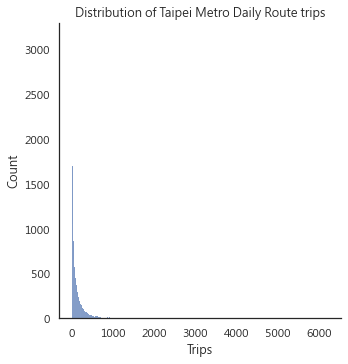

In [91]:
sns.displot(x=temp['Counts'])
plt.xlabel('Trips')
plt.title('Distribution of Taipei Metro Daily Route trips')
plt.show()

In [92]:
print('平均日旅次前10高路線:')
temp.head(10)

平均日旅次前10高路線:


,Entrance,Exit,Counts
0,西門,台北車站,6235.548140
1,台北車站,西門,5953.443107
2,台北車站,市政府,5249.208972
3,市政府,台北車站,5138.914661
4,淡水,台北車站,3805.438731
5,台北101/世貿,台北車站,3699.745077
6,台北車站,台北101/世貿,3636.752735
7,台北車站,忠孝復興,3588.185996
8,忠孝復興,台北車站,3554.949672
9,劍潭,台北車站,3540.537199


In [93]:
print('平均日旅次小於1次的路線')
temp[temp['Counts'] < 1]

平均日旅次小於1次的路線


,Entrance,Exit,Counts
13638,Y板橋,松山,0.992701
13639,中和,BL板橋,0.990876
13640,Y板橋,石牌,0.989051
13641,龍山寺,Y板橋,0.987226
13642,內湖,新北產業園區,0.983577
...,...,...,...
14156,辛亥,新埔民生,0.014599
14157,大湖公園,新埔民生,0.012774
14158,新埔民生,萬芳社區,0.009124
14159,萬芳社區,十四張,0.007299


In [94]:
temp['Route'] = temp['Entrance'] + '→' +  temp['Exit']
temp.head(5)

,Entrance,Exit,Counts,Route
0,西門,台北車站,6235.548140,西門→台北車站
1,台北車站,西門,5953.443107,台北車站→西門
2,台北車站,市政府,5249.208972,台北車站→市政府
3,市政府,台北車站,5138.914661,市政府→台北車站
4,淡水,台北車站,3805.438731,淡水→台北車站


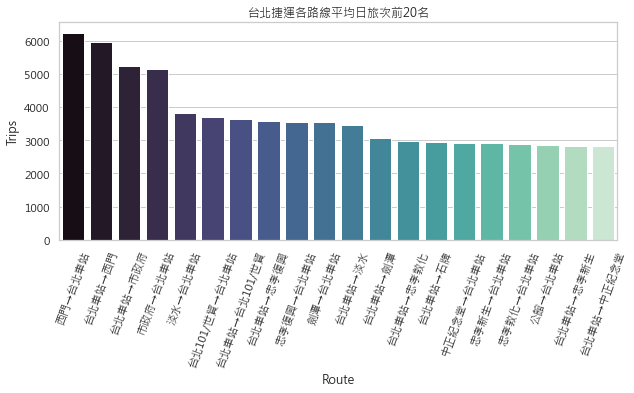

In [95]:
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

fig = plt.figure(figsize=(10,4))
sns.barplot(x=temp['Route'][:20], y=temp['Counts'][:20], palette='mako')
plt.xticks(rotation=70)
plt.ylabel('Trips')
plt.title('台北捷運各路線平均日旅次前20名')
plt.show()

## 3.2 COVID-19後期間，平均日旅次減少最多的路線？

In [96]:
before = pd.DataFrame(routes_daily[routes_daily['Date'] < datetime.strptime('2020-01-01', '%Y-%m-%d')].groupby(['Entrance','Exit'])['Counts'].mean().sort_values(ascending=False)).reset_index()
after = pd.DataFrame(routes_daily[routes_daily['Date'] >= datetime.strptime('2020-01-01', '%Y-%m-%d')].groupby(['Entrance','Exit'])['Counts'].mean().sort_values(ascending=False)).reset_index()
len(before), len(after)

(11664, 14161)

環狀線產生的路線不同，故前後路線數量有差異

In [97]:
routes_comp = before.merge(after, how='inner', on=['Entrance','Exit'], suffixes=['_before','_after'])
routes_comp['Diff_ratio'] = (routes_comp['Counts_after'] - routes_comp['Counts_before']) / routes_comp['Counts_before']
routes_comp['Entrance_Line'] = routes_comp['Entrance'].apply(lambda _: get_line(_))
routes_comp['Exit_Line'] = routes_comp['Exit'].apply(lambda _: get_line(_))
routes_comp = routes_comp.sort_values(by='Diff_ratio', ascending=True)
len(routes_comp)

11664

In [98]:
routes_comp.describe()

,Counts_before,Counts_after,Diff_ratio
count,11664.000000,11664.000000,11664.000000
mean,185.284393,148.370590,-0.153670
std,351.216445,259.361459,0.194863
min,0.147945,0.160291,-0.832536
25%,26.807534,22.359745,-0.216105
50%,82.594521,68.724954,-0.160515
75%,208.698630,171.377505,-0.106953
max,8593.712329,4735.488160,5.523920


In [99]:
print(f"COVID-19前路線平均日旅次為：{routes_comp.describe().loc['mean','Counts_before']}")
print(f"COVID-19後路線平均日旅次為：{routes_comp.describe().loc['mean','Counts_after']}")
print(f"路線平均日旅次於COVID-19之後差異: {routes_comp.describe().loc['mean','Diff_ratio']}")

COVID-19前路線平均日旅次為：185.28439267527307
COVID-19後路線平均日旅次為：148.37058993656046
路線平均日旅次於COVID-19之後差異: -0.15366980288079204


In [100]:
print(f'平均日旅次減少前十名之搭乘路線')
routes_comp.head(10)

平均日旅次減少前十名之搭乘路線


,Entrance,Exit,Counts_before,Counts_after,Diff_ratio,Entrance_Line,Exit_Line
3938,景安,BL板橋,148.621918,24.888889,-0.832536,T,BL
3650,BL板橋,景安,163.287671,33.672131,-0.793786,BL,T
2360,動物園,台北101/世貿,253.539726,69.595628,-0.725504,BR,R
2019,大坪林,BL板橋,285.071233,79.125683,-0.722435,T,BL
10419,迴龍,新埔,10.238356,2.901639,-0.716591,O,BL
9449,迴龍,BL板橋,18.761644,5.387978,-0.712820,O,BL
10263,BL板橋,先嗇宮,11.643836,3.468124,-0.702149,BL,O
2455,BL板橋,南勢角,244.627397,74.285974,-0.696330,BL,O
9079,輔大,BL板橋,23.090411,7.067395,-0.693925,O,BL
10412,先嗇宮,BL板橋,10.273973,3.169399,-0.691512,O,BL


* 景安<->BL板橋減少最多，推測因環狀線開通，環狀線板橋站(Y板橋)需出站才可轉乘藍線板橋站(BL板橋)，直接至Y板橋出站，或可能是旅次紀錄中斷。
* 觀察大多為中和新蘆線(O)<->板藍線(BL)的搭乘路線，由於該時間點也為環狀線開通，故此類型搭乘路線可被環狀線路線所取代，故路線平均日旅次減少。
* 環狀線板橋站(Y板橋)需出站才可轉乘藍線板橋站(BL板橋)，新埔民生站需出站才可轉乘藍線新埔站，自該兩站轉乘藍線或藍線轉乘該兩站的旅次紀錄中斷紀錄。

In [101]:
routes_comp[routes_comp['Counts_before'] >= routes_comp['Counts_before'].quantile(.75)][:10]

,Entrance,Exit,Counts_before,Counts_after,Diff_ratio,Entrance_Line,Exit_Line
2360,動物園,台北101/世貿,253.539726,69.595628,-0.725504,BR,R
2019,大坪林,BL板橋,285.071233,79.125683,-0.722435,T,BL
2455,BL板橋,南勢角,244.627397,74.285974,-0.696330,BL,O
2670,南勢角,BL板橋,228.947945,70.939891,-0.690148,O,BL
2419,BL板橋,大坪林,247.758904,78.648452,-0.682561,BL,T
882,西門,動物園,503.775342,165.127505,-0.672220,T,BR
100,劍潭,西門,1813.745205,645.258652,-0.644240,R,T
102,台北101/世貿,西門,1804.030137,703.080146,-0.610273,R,T
2021,BL板橋,永安市場,284.594521,113.438980,-0.601401,BL,O
160,西門,台北101/世貿,1442.942466,591.302368,-0.590211,T,R


* 篩選三級警戒前，日旅次高於75%者。
* 除了環狀線外，大多減少的為觀光路線相關，如動物園→台北101，西門→動物園，劍潭→西門等

## 3.3 COVID-19雙北三級警戒後，各路線平均日旅次變化

2021/05/11政府提升全國疫情警戒至第二級，05/15雙北地區警戒提升至第三級，05/19全國警戒提升至第三級，日旅運量當月起大幅下降。

In [102]:
after = pd.DataFrame(routes_daily[routes_daily['Date'] >= datetime.strptime('2021-05-15', "%Y-%m-%d")].groupby(['Entrance','Exit'])['Counts'].mean().sort_values(ascending=False)).reset_index()
len(before), len(after)

(11664, 14161)

In [103]:
routes_comp2 = before.merge(after, how='inner', on=['Entrance','Exit'], suffixes=['_before','_after'])
routes_comp2['Diff_ratio'] = (routes_comp2['Counts_after'] - routes_comp2['Counts_before']) / routes_comp2['Counts_before']
routes_comp2['Entrance_Line'] = routes_comp2['Entrance'].apply(lambda _: get_line(_))
routes_comp2['Exit_Line'] = routes_comp2['Exit'].apply(lambda _: get_line(_))
routes_comp2 = routes_comp2.sort_values(by='Diff_ratio', ascending=True)
len(routes_comp2)

11664

In [104]:
routes_comp2.describe()

,Counts_before,Counts_after,Diff_ratio
count,11664.000000,11664.000000,11664.000000
mean,185.284393,36.897566,-0.769372
std,351.216445,55.178157,0.108248
min,0.147945,0.000000,-1.000000
25%,26.807534,5.829787,-0.832459
50%,82.594521,18.031915,-0.776581
75%,208.698630,44.813830,-0.722766
max,8593.712329,789.255319,1.571733


In [105]:
print(f"COVID-19前路線平均日旅次為：{routes_comp2.describe().loc['mean','Counts_before']}")
print(f"雙北三級警戒後路線平均日旅次為：{routes_comp2.describe().loc['mean','Counts_after']}")
print(f"路線平均日旅次於雙北三級警戒後差異: {routes_comp2.describe().loc['mean','Diff_ratio']}")

COVID-19前路線平均日旅次為：185.2843926752736
雙北三級警戒後路線平均日旅次為：36.89756625222544
路線平均日旅次於雙北三級警戒後差異: -0.7693715015966345


In [106]:
print(f'平均日旅次減少前十名之搭乘路線')
routes_comp2.head(10)

平均日旅次減少前十名之搭乘路線


,Entrance,Exit,Counts_before,Counts_after,Diff_ratio,Entrance_Line,Exit_Line
11653,萬隆,辛亥,0.457534,0.000000,-1.000000,G,BR
11492,萬隆,動物園,2.331507,0.000000,-1.000000,G,BR
10605,動物園,新店,8.838356,0.042553,-0.995185,BR,G
9603,動物園,台電大樓,17.169863,0.085106,-0.995043,BR,G
2360,動物園,台北101/世貿,253.539726,1.297872,-0.994881,BR,R
4926,台北101/世貿,動物園,110.830137,0.765957,-0.993089,R,BR
9339,公館,動物園,20.030137,0.148936,-0.992564,G,BR
8126,景安,動物園,35.520548,0.297872,-0.991614,T,BR
9884,台電大樓,動物園,14.643836,0.127660,-0.991282,G,BR
8729,動物園,公館,27.038356,0.276596,-0.989770,BR,G


* 原本路線平均日旅次就少，三級警戒後變為0，故Ratio有高達-1
* 主要為文湖線，尤其為動物園站

In [107]:
routes_comp2[routes_comp2['Counts_before'] >= routes_comp['Counts_before'].quantile(.75)].head(10)

,Entrance,Exit,Counts_before,Counts_after,Diff_ratio,Entrance_Line,Exit_Line
2360,動物園,台北101/世貿,253.539726,1.297872,-0.994881,BR,R
882,西門,動物園,503.775342,10.063830,-0.980023,T,BR
1191,動物園,西門,417.441096,8.872340,-0.978746,BR,T
253,台北車站,動物園,1061.597260,24.574468,-0.976851,T,BR
367,動物園,台北車站,878.183562,25.170213,-0.971338,BR,T
100,劍潭,西門,1813.745205,55.914894,-0.969172,R,T
173,西門,劍潭,1365.660274,51.765957,-0.962095,T,R
2019,大坪林,BL板橋,285.071233,11.978723,-0.957980,T,BL
2815,西門,新北投,217.298630,9.340426,-0.957016,T,R
79,龍山寺,西門,1991.323288,89.297872,-0.955157,BL,T


* 篩選三級警戒前，日旅次高於75%者。
* 除了環狀線外，大多減少的為觀光路線相關，如動物園→台北101，西門→動物園，劍潭→西門等

# 4.  捷運路線每日分時旅次(201901-202106)

In [64]:
routes_counts = pd.read_csv('./Data/Taipei_Metro_Route_hourly_2019-202106.csv')

In [65]:
routes_counts['Date'] = pd.to_datetime(routes_counts['Date'])
routes_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252135281 entries, 0 to 252135280
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      datetime64[ns]
 1   Hour      int64         
 2   Entrance  object        
 3   Exit      object        
 4   Counts    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.4+ GB


## 4.1 每日分時平均旅次

In [66]:
temp = routes_counts[routes_counts['Date'] < datetime.strptime('2020-01-01', "%Y-%m-%d")].pivot_table(values='Counts', index=['Date','Hour'], aggfunc=np.sum).reset_index()
hour_2019 = temp.groupby('Hour')['Counts'].mean()
hour_2019.head()

Hour
0     14450.219178
1       673.126027
5        36.222527
6     27471.473973
7    106956.158904
Name: Counts, dtype: float64

In [67]:
hour_2019.describe()

count        21.000000
mean     102912.250257
std       61352.392397
min          36.222527
25%       94929.000000
50%      106222.553425
75%      124165.783562
max      230521.550685
Name: Counts, dtype: float64

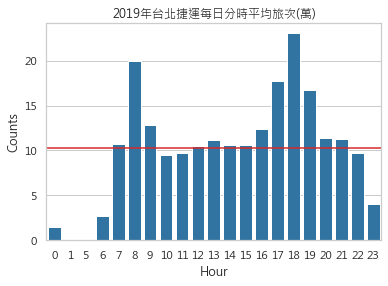

In [68]:
fig, ax = plt.subplots()
sns.barplot(x=hour_2019.index, y=hour_2019/10000, color='tab:blue', ax=ax)
plt.axhline(y=hour_2019.mean()/10000, xmin=0, xmax=1, color='tab:red')
plt.title('2019年台北捷運每日分時平均旅次(萬)')
plt.show()

捷運的時運量尖峰出現在早上7時至9時與16時至20時，具明顯的雙峰。

In [69]:
#fig.savefig('2019年台北捷運每日分時平均旅次.png', dpi=200)

#### COVID-19後，每日分時平均旅次減少多少？

In [70]:
temp = routes_counts[routes_counts['Date'] >= datetime.strptime('2020-01-01', "%Y-%m-%d")].pivot_table(values='Counts', index=['Date','Hour'], aggfunc=np.sum).reset_index()
hour_2020 = temp.groupby('Hour')['Counts'].mean()

In [71]:
temp = routes_counts[routes_counts['Date'] >= datetime.strptime('2021-05-15', "%Y-%m-%d")].pivot_table(values='Counts', index=['Date','Hour'], aggfunc=np.sum).reset_index()
hour_202105 = temp.groupby('Hour')['Counts'].mean()

In [72]:
hour_comp = pd.DataFrame([hour_2019, hour_2020, hour_202105]).T.fillna(0).reset_index()
hour_comp.set_axis(['Hour', 'COVID_Before', 'COVID_After','Lockdown_After'], axis='columns', inplace=True)
hour_comp['COVID_Diff'] = (hour_comp['COVID_After'] - hour_comp['COVID_Before']) / hour_comp['COVID_Before']
hour_comp['Lockdown_Diff'] = (hour_comp['COVID_After'] - hour_comp['Lockdown_After']) / hour_comp['COVID_Before']
hour_comp.head()

,Hour,COVID_Before,COVID_After,Lockdown_After,COVID_Diff,Lockdown_Diff
0,0,14450.219178,11463.232176,1923.702128,-0.206709,0.660165
1,1,673.126027,401.824497,59.893617,-0.403047,0.507975
2,2,0.000000,53917.500000,0.000000,inf,inf
3,3,0.000000,26905.500000,0.000000,inf,inf
4,4,0.000000,15887.000000,0.000000,inf,inf


捷運1~4時為不營運，多為跨年活動延長營運期間，比較時先排除

In [73]:
hour_comp = hour_comp[~hour_comp['Hour'].isin([2,3,4])]
hour_comp.head()

,Hour,COVID_Before,COVID_After,Lockdown_After,COVID_Diff,Lockdown_Diff
0,0,14450.219178,11463.232176,1923.702128,-0.206709,0.660165
1,1,673.126027,401.824497,59.893617,-0.403047,0.507975
5,5,36.222527,82.266910,15.957447,1.271153,1.830614
6,6,27471.473973,24894.102377,12348.659574,-0.093820,0.456672
7,7,106956.158904,97690.014625,39815.340426,-0.086635,0.541107


In [74]:
print(f"COVID-19前每日分時平均旅次為：{hour_comp['COVID_Before'].mean()}")
print(f"COVID-19後每日分時平均旅次為：{hour_comp['COVID_After'].mean()}, 差異{(hour_comp['COVID_After'].mean()-hour_comp['COVID_Before'].mean())/hour_comp['COVID_Before'].mean()}")
print(f"雙北三級警戒後每日分時平均旅次為：{hour_comp['Lockdown_After'].mean()}, 差異{(hour_comp['Lockdown_After'].mean()-hour_comp['COVID_Before'].mean())/hour_comp['COVID_Before'].mean()}")

COVID-19前每日分時平均旅次為：102912.25025734212
COVID-19後每日分時平均旅次為：84919.7569426308, 差異-0.17483334850534638
雙北三級警戒後每日分時平均旅次為：21196.325227963527, 差異-0.794034964982691


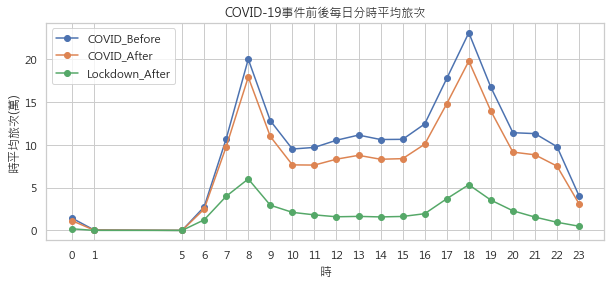

In [76]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(hour_comp['Hour'], hour_comp['COVID_Before']/10000, 
        hour_comp['Hour'], hour_comp['COVID_After']/10000,
        hour_comp['Hour'], hour_comp['Lockdown_After']/10000, marker='o')
ax.legend(hour_comp[['COVID_Before','COVID_After','Lockdown_After']])
ax.set_xticks(hour_comp['Hour'].unique())
ax.set_xlabel('時')
ax.set_ylabel('時平均旅次(萬)')
plt.title('COVID-19事件前後每日分時平均旅次')
plt.show()

* COVID-19事件後，每日分時平均旅次趨勢類似，旅次量減少。
* 雙北三級警戒後，旅次量大量減少，而通勤時間的雙峰較不明顯。

In [77]:
#fig.savefig('COVID-19事件前後每日分時平均旅次', dpi=200)